In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_curve,roc_auc_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics

In [ ]:
#dataset loading
data = pd.read_excel('Bitcoin_Heist_data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60586 entries, 0 to 60585
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    60586 non-null  object 
 1   year       60586 non-null  int64  
 2   day        60586 non-null  int64  
 3   length     60586 non-null  int64  
 4   weight     60586 non-null  float64
 5   count      60586 non-null  int64  
 6   looped     60586 non-null  int64  
 7   neighbors  60586 non-null  int64  
 8   income     60586 non-null  int64  
 9   label      60586 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 4.6+ MB


In [ ]:
# cleaning data
data.dropna(inplace=True)  # remove the rows with missing values
data.drop_duplicates(inplace=True)  # delete the duplicate rows

In [ ]:
# feature Selection/Extraction
# metioned all categorical columns alone
selected_features = ['address', 'year', 'day', 'length', 'weight', 'count','looped','neighbors','income']
data = data[selected_features]

In [ ]:
# using lable encoding to convert the categorical variables to numerical
label_encoder = LabelEncoder()
data['address'] = label_encoder.fit_transform(data['address'])


In [ ]:
# splitting the dataset into features (X) and target variable (y)
X = data.drop('address', axis=1)
y = data['address']


In [ ]:
# Normalize/Scale the Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# break/split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# using StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print the preprocessed data
print("X_train_scaled:")
print(X_train_scaled)
print("\nX_test_scaled:")
print(X_test_scaled)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)


X_train_scaled:
[[-0.41006713 -0.34054559  0.21027443 ... -0.07403033  0.01911813
  -0.04144267]
 [ 1.56906789 -0.02488755 -0.42154788 ... -0.07403033  0.01911813
  -0.04139084]
 [-0.41006713 -0.05495022  1.24416549 ... -0.06930384  1.02358178
  -0.03911529]
 ...
 [ 2.88849124  1.53837133 -0.59386306 ... -0.07403033  0.01911813
  -0.03963989]
 [-0.41006713 -0.6862663  -0.59386306 ... -0.07403033  0.01911813
  -0.04132973]
 [-0.41006713  0.00517512 -0.13435592 ... -0.07403033  0.01911813
  -0.04063998]]

X_test_scaled:
[[-0.41006713 -0.20526357  0.03795925 ... -0.07403033  0.01911813
  -0.03527934]
 [-0.41006713 -0.14513823  0.03795925 ... -0.07403033  0.01911813
  -0.03701379]
 [-0.41006713 -0.20526357 -0.47898627 ... -0.07403033 -0.48311369
  -0.03773983]
 ...
 [ 0.90935622  2.99641086  3.48426278 ... -0.06930384  1.02358178
  -0.04128582]
 [-0.41006713 -0.16016957  2.16317976 ... -0.07403033  0.01911813
  -0.03241549]
 [-0.41006713 -0.05495022  1.1867271  ... -0.07403033  0.01911813


In [ ]:
# initializing Decision Tree classifier
dt = DecisionTreeClassifier()

# Training classifier
dt.fit(X_train, y_train)

# test data prediction
y_pred = dt.predict(X_test)


In [ ]:
# define the hyperparameter grid for tuning
param_grid = {'max_depth': [5, 10, 20, 30],
              'min_samples_leaf': [2, 5, 10],
              'random_state':range(20)}

# finding the best hyperparameters by perform grid search cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs  =-1,verbose = 2)
grid_search.fit(X_train, y_train)

# to get the best hyperparameters
dt_best = grid_search.best_estimator_
dt_best.fit(X_train, y_train)

# predictions on the test set
y_pred = dt_best.predict(X_test)

# Compute accuracy
Accuracy={}
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)
dectree = {"Decision_Tree":accuracy}
Accuracy.update(dectree)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Accuracy: 98.84469384386863


In [ ]:
# to get classification report
Class_Report = classification_report(y_test,y_pred)
print(Class_Report)


              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2014
           1       0.99      1.00      0.99     10104

    accuracy                           0.99     12118
   macro avg       0.99      0.97      0.98     12118
weighted avg       0.99      0.99      0.99     12118



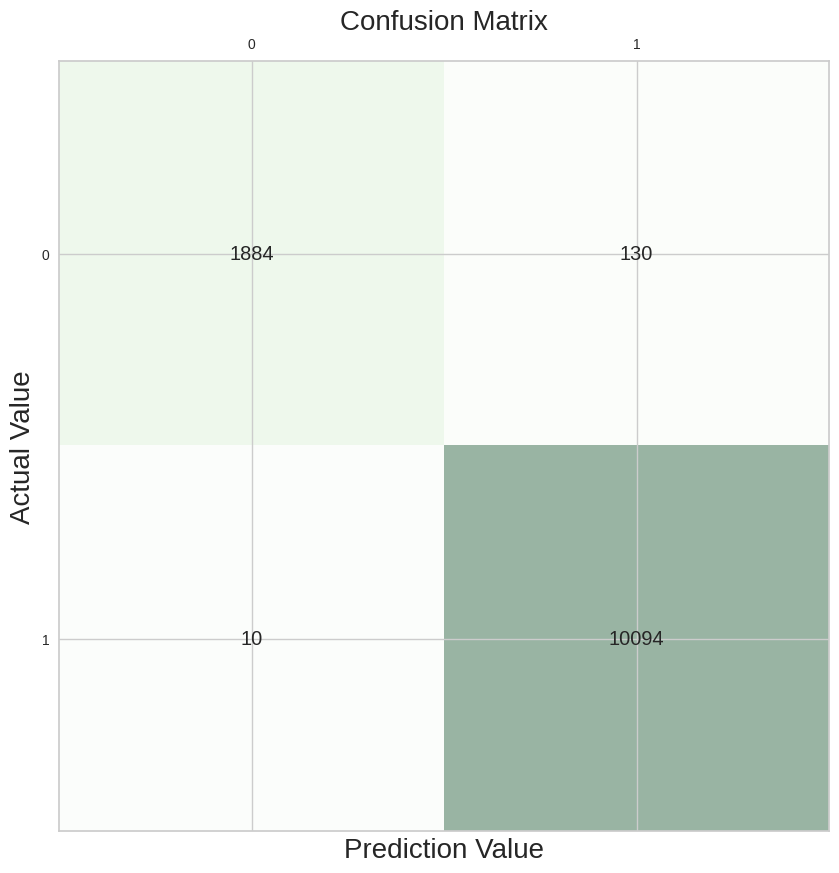

In [ ]:
# calculate confusion matrix
Conf_Matrix = confusion_matrix(y_true= y_test, y_pred= y_pred)

# plot confusion matrix
fig, ax = plt.subplots(figsize = (10,10))
ax.matshow(Conf_Matrix, cmap = plt.cm.Greens, alpha = 0.4)

# loop over the matrix and add text annotations
for i in range(Conf_Matrix.shape[0]):
  for j in range(Conf_Matrix.shape[1]):
    ax.text(x=j, y=i, s=Conf_Matrix[i, j], va='center', ha='center', size='large')

# setting axis labels and title
plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix', fontsize =20)

# display plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


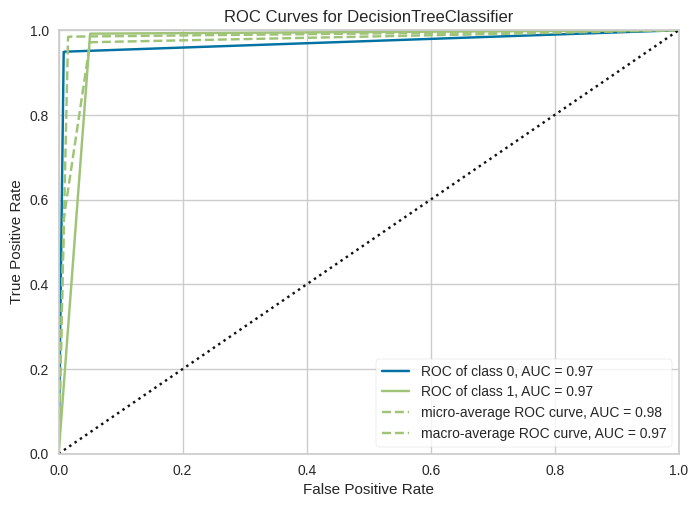

ROC AUC :0.9672


In [ ]:
# initializing the ROCAUC visualizer for Decision Tree classifier
visualizer = ROCAUC(dt)

# fit visualizer on the training data
visualizer.fit(X_train,y_train)

# Score visualizer on the test data
visualizer.score(X_test,y_test)

# show ROC curve
visualizer.show()

# calculating the ROC AUC score
ROC_score = roc_auc_score(y_test,y_pred)
print(f"ROC AUC :{ROC_score:.4f}")

In [ ]:

# Initializing  Random Forest classifier
rf = RandomForestClassifier()

# Training classifier
rf.fit(X_train, y_train)

# Predict test data
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))


Accuracy Score: 98.98%


In [ ]:

# define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': [2, 5, 10],
    'random_state': [20]
}

# finding the best hyperparameters by perform grid search cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# to get the best hyperparameters
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

# predictions on the test set
y_pred = rf_best.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy)
random_forest = {"Random_Forest": accuracy}
Accuracy.update(random_forest)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Accuracy: 98.93546789899324


In [ ]:
# to get classification report
Class_Report = classification_report(y_test,y_pred)
print(Class_Report)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2014
           1       0.99      1.00      0.99     10104

    accuracy                           0.99     12118
   macro avg       0.99      0.97      0.98     12118
weighted avg       0.99      0.99      0.99     12118



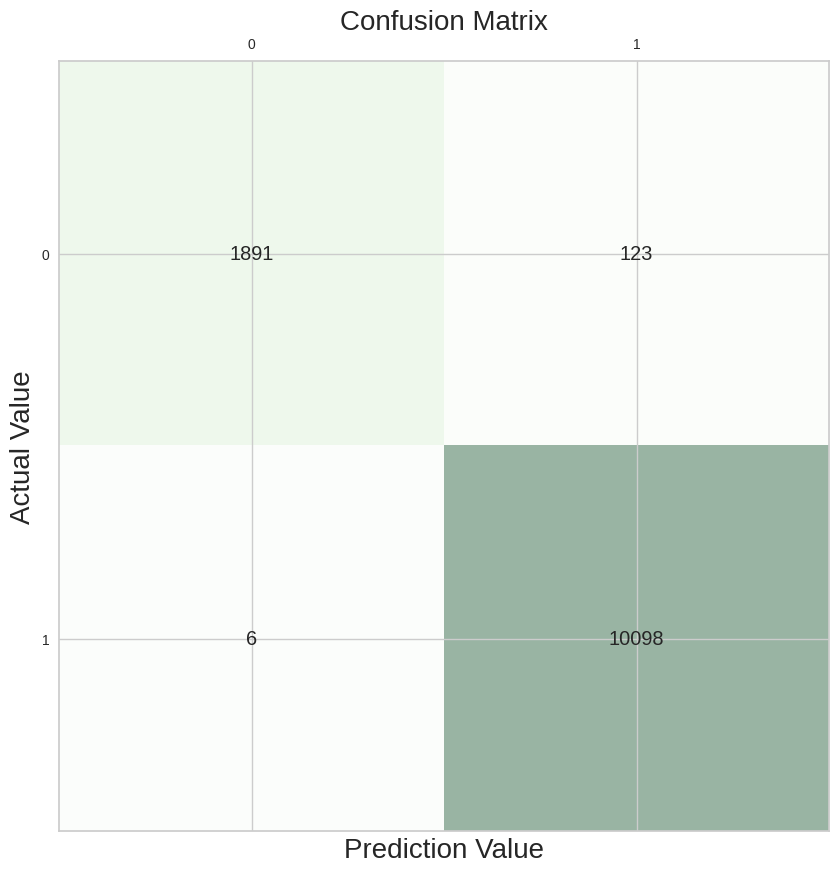

In [ ]:
# calculate confusion matrix
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confusion_matrix, cmap=plt.cm.Greens, alpha=0.4)

# loop over the matrix and add text annotations
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center', size='large')

# setting axis labels and title
plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)

# display plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


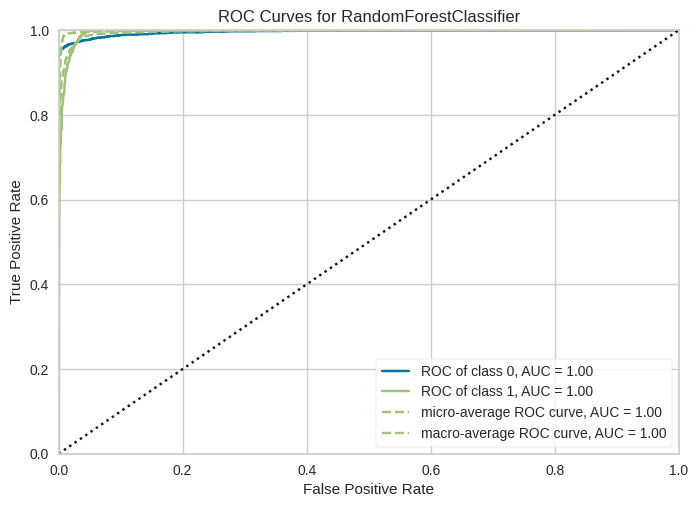

ROC AUC: 0.9959


In [ ]:

# initializing the ROCAUC visualizer for Random Forest classifier
visualizer = ROCAUC(rf_best)

# fit visualizer on the training data
visualizer.fit(X_train, y_train)

# score visualizer on the test data
visualizer.score(X_test, y_test)

# show the ROC curve
visualizer.show()

# calculating the ROC AUC score
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_score:.4f}")


In [ ]:
# Initializing KNN classifier
knn = KNeighborsClassifier()

# Training classifier
knn.fit(X_train, y_train)

# predict on test data
y_pred = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))


Accuracy Score: 94.04%


In [ ]:

# define the hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# finding the best hyperparameters by perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# to get the best hyperparameters
knn_best = grid_search.best_estimator_
knn_best.fit(X_train, y_train)

# predictions on the test set
y_pred = knn_best.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy: 95.42%


In [ ]:
# to get classification report
Class_Report = classification_report(y_test,y_pred)
print(Class_Report)

              precision    recall  f1-score   support

           0       0.96      0.75      0.85      2014
           1       0.95      0.99      0.97     10104

    accuracy                           0.95     12118
   macro avg       0.96      0.87      0.91     12118
weighted avg       0.95      0.95      0.95     12118



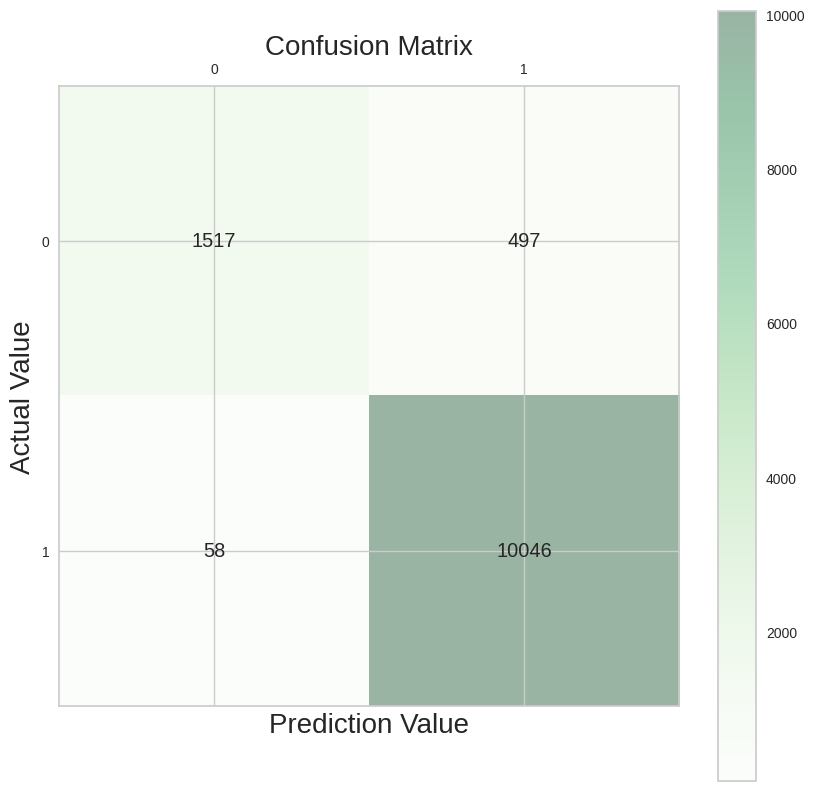

In [ ]:

# finding the confusion matrix
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# set a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# display the plot for confusion matrix as a heatmap
im = ax.matshow(confusion_matrix, cmap=plt.cm.Greens, alpha=0.4)

# loop over the matrix and add text annotations
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center', size='large')

# setting axis labels and title
plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)

# tp display the colorbar
plt.colorbar(im)

# display the plot
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


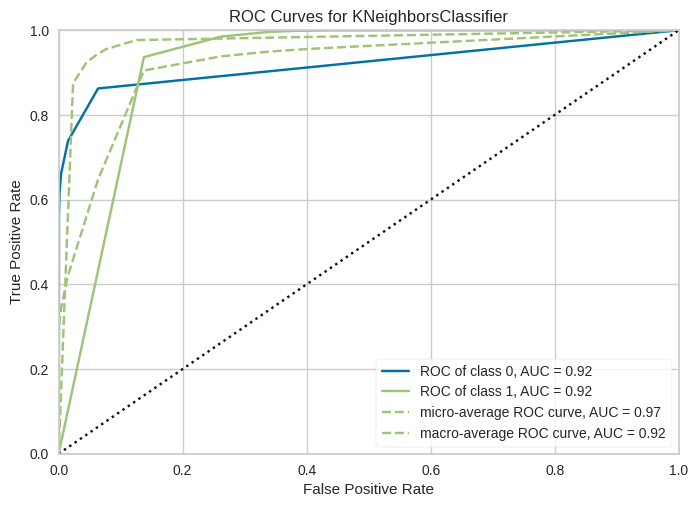

ROC AUC: 0.9209


In [ ]:

# initializing the ROCAUC visualizer for KNN classifier
visualizer = ROCAUC(knn)

# fit visualizer on the training data
visualizer.fit(X_train, y_train)

# Score visualizer on the test data
visualizer.score(X_test, y_test)

# show ROC curve
visualizer.show()

# calculating the ROC AUC score
y_pred_proba = knn.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_score:.4f}")
